# Tarea 5 - Diferenciacion Automatica - Parte 2

Autores: Alejandra Yuriko Yamamoto Elizalde, Ignacio Vargas Cordero

## I. 
Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.org/en/release-0.4/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea5.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Aprovechen las capacidades de Julia en metaprogramming.

In [1]:
#Incluimos el AutomDiff.jl de la Tarea4. De aquí importamos el módulo AD, en el cual se definen ya la suma, resta, 
#multiplicación, división y potencias de duales. 

include("AutomDiff-2.0.jl")
import AD: Dual, xdual

#Debemos importar definiciones adicionales de base.

import Base: exp, log, sin, cos, tan, cot, sec, csc, asin, acos, atan, acot, asec, acsc, sinh, cosh, tanh, coth, sech, csch, asinh, acosh, atanh, acoth, asech, acsch

# Aquí se implementan los métodos necesarios para cada función

#Exponenciales
exp(a::Dual) = Dual(exp(a.fun), a.der * exp(a.fun)) 


#Logaritmos
log(a::Dual) = Dual(log(10,a.fun), a.der / a.fun) 


#Funciones Trigonométricas
sin(a::Dual) = Dual(sin(a.fun), a.der * cos(a.fun)) 

cos(a::Dual) = Dual(cos(a.fun), -a.der * sin(a.fun))

tan(a::Dual) = Dual(tan(a.fun), a.der * sec^2(a.fun))

cot(a::Dual) = Dual(cot(a.fun), -a.der * csc^2(a.fun))

sec(a::Dual) = Dual(sec(a.fun), a.der * sec(a.der) * tan(a.der))

csc(a::Dual) = Dual(csc(a.fun), -a.der * csc(a.der) * cot(a.der))

asin(a::Dual) = Dual(asin(a.fun), a.der * 1/sqrt(1 - (a.der)^2))

acos(a::Dual) = Dual(acos(a.fun), -a.der * 1/sqrt(1 - (a.der)^2))

atan(a::Dual) = Dual(atan(a.fun), a.der * 1/(1 + (a.der)^2))

acot(a::Dual) = Dual(acot(a.fun), -a.der * 1/(1 + (a.der)^2))

asec(a::Dual) = Dual(asec(a.fun), a.der * 1/(abs(a.der) * sqrt((a.der)^2 -1)))

acsc(a::Dual) = Dual(acsc(a.fun), -a.der * 1/(abs(a.der) * sqrt((a.der)^2 -1)))
 

#Funciones Hiperbólicas
sinh(a::Dual) = Dual(sinh(a.fun), a.der * cosh(a.fun))
 
cosh(a::Dual) = Dual(cosh(a.fun), a.der * sinh(a.fun))

tanh(a::Dual) = Dual(tanh(a.fun), a.der - a.der*tanh^2(a.fun))

coth(a::Dual) = Dual(coth(a.fun), -a.der * (csch(a.der))^2)

sech(a::Dual) = Dual(sech(a.fun), -a.der * sech(a.der) * tanh(a.der))

csch(a::Dual) = Dual(csch(a.fun), -a.der * csch(a.der) *coth(a.der))

asinh(a::Dual) = Dual(asinh(a.fun), a.der * 1/sqrt(1 + (a.der)^2))

acosh(a::Dual) = Dual(acosh(a.fun), a.der * 1/sqrt((a.der)^2 -1))
acosh(a::Dual) = Dual(acosh(a.fun), -a.der * 1/sqrt((a.der)^2 -1))

atanh(a::Dual) = Dual(atanh(a.fun), a.der * 1/(1 - (a.der)^2))
atanh(a::Dual) = Dual(atanh(a.fun), -a.der * 1/(1 - (a.der)^2))

acoth(a::Dual) = Dual(acoth(a.fun), a.der * 1/(1-(a.der)^2))

asech(a::Dual) = Dual(asech(a.fun), -a.der * 1/(abs(a.der) * sqrt(1 - (a.der)^2))) 
asech(a::Dual) = Dual(asech(a.fun), a.der * 1/(abs(a.der) * sqrt(1 - (a.der)^2))) 

acsch(a::Dual) = Dual(acsch(a.fun), -a.der * 1/(abs(a.der) * sqrt(1 + (a.der)^2)))




acsch (generic function with 4 methods)

## II.
Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [2]:
f(x) = sin(x^3 - 2/x^6)

#Calculando la derivada
#Como x0 = 2, calculamos f(xdual(2)). La segunda entrada es la derivada de f(x) evaluada en x0 = 2

f(xdual(2))

AD.Dual{Float64}(0.9934213368955197,-1.3634630465231001)

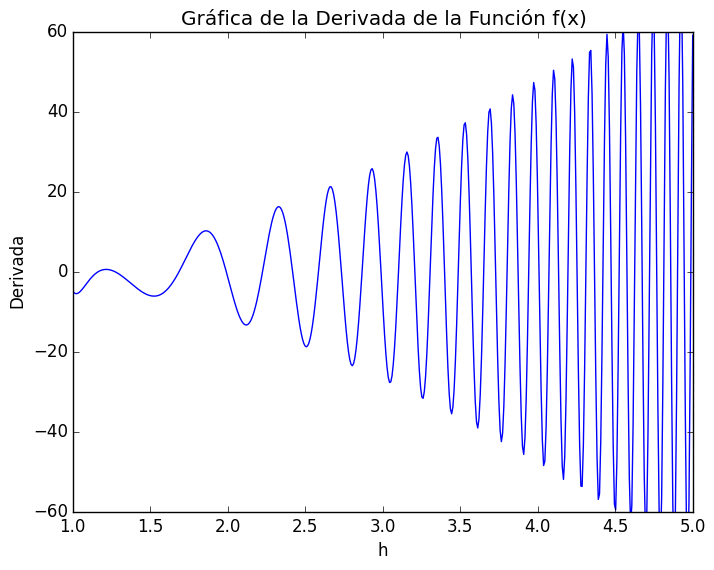

PyObject <matplotlib.text.Text object at 0x31dbcaa10>

In [3]:
#Plot
using PyPlot

h = linspace(1.0, 5.0, 500);
derivada = zeros(Float64, 500);
k = 1
for i in h
    derivada[k] = f(xdual(i)).der
    k = k + 1
end

plot(h, derivada);
title("Gráfica de la Derivada de la Función f(x)")
xlim(1.0, 5.0)
ylim(-60.0, 60.0)
xlabel("h")
ylabel("Derivada")

## III.
Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [4]:
#Raíces del polinomio de Wilkinson

#W6(x) = (x+1)*(x+2)*(x+3)*(x+4)*(x+5)*(x+6) 
#Cambiaremos los signos para no tener que modificar el valor inicial x0 a -2.2 y -2.45
W6(x) = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)


#Método de Newton para f(x)

function newton1D(f::Function, x0::Real)
   
    for i in 0:50
        
        xn = xdual(x0) #Da como resultado un Dual(x0, 1)
        fxd = f(xn)
        
        x0 = x0 - (fxd.fun/fxd.der)
    end
    
    return x0
end



newton1D (generic function with 1 method)

In [5]:
newton1D(W6, 2.2)

2.0

In [6]:
newton1D(W6, 2.45)

6.0

In [7]:
#Función g(x)
g(x) = x*sin(2x)

g (generic function with 1 method)

In [8]:
#Aquí se obtiene una de las raíces de la función g(x) usandoo como x0=0.7
newton1D(g, 0.7)

1.1892569912292095e-16

In [9]:
#Pruebas
using Base.Test

In [10]:
@test xdual(2)==AD.Dual{Int64}(2,1) #No marca error

In [11]:
@test f(xdual(2))==AD.Dual{Float64}(0.9934213368955197,-1.3634630465231001) #Correcto, no marca error.

In [12]:
@test f(xdual(2))==AD.Dual{Float64}(0.9934213368955197,1)
#Es correcto, marca error

LoadError: LoadError: test failed: AD.Dual{Float64}(0.9934213368955197,-1.3634630465231001) == AD.Dual{Float64}(0.9934213368955197,1.0)
 in expression: f(xdual(2)) == AD.Dual{Float64}(0.9934213368955197,1)
while loading In[12], in expression starting on line 1

In [13]:
@test newton1D(W6, 2.2)==1
#Correcto, marca error

LoadError: LoadError: test failed: 2.0 == 1
 in expression: newton1D(W6,2.2) == 1
while loading In[13], in expression starting on line 1

In [14]:
@test newton1D(W6, 2.2)==2.0
@test newton1D(W6, 2.45)==6.0
#Correcto, no marca errores

## IV.
¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea; la idea es empezar a pensar en esto.

Se utiliza un vector con *n+1* número de entradas, donde la primer componente será la función, la segunda entrada  será la primer derivada, etc. Por lo que el vector tendrá las primeras *n* derivadas de la función dada.